<h1 style = "font-size:3rem;color:orange">Applying Filters to Audio Files</h1>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 

import librosa                    
import librosa.display 

In [2]:
# import audio

data , sr  = librosa.load('../samples/06 Carillon de mÇtal.wav')
ipd.Audio(data,rate=sr)

In [51]:
# simple first order IIR high pass filter

def high_pass(data):
    y = np.zeros(len(data))
    for n in range(5,len(data)):
        y[n] = 1 * data[n] - 0.95 * y[n-1]
    return y

In [49]:
# apply
data_filtered = high_pass(data)
ipd.Audio(data_filtered,rate=sr)

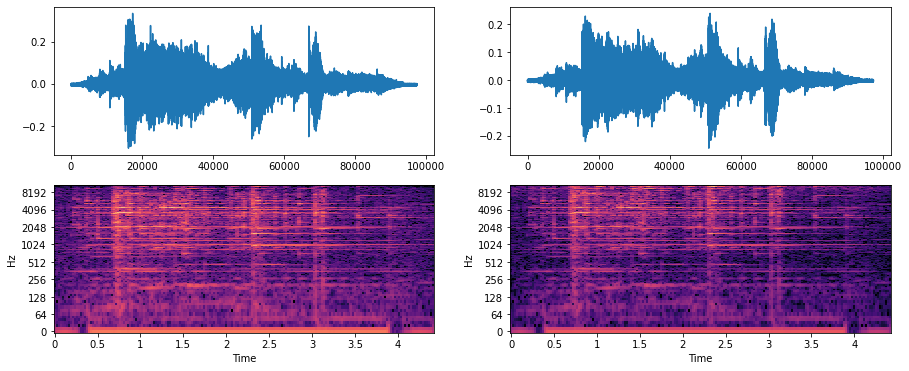

In [50]:
# plot signal in time and frequency domain

plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
plt.plot(data)
plt.subplot(2,2,2)
plt.plot(data_filtered)

plt.subplot(2,2,3)
STFT = abs(librosa.stft(data))
STFT_db = librosa.amplitude_to_db(abs(STFT), ref=np.max)
img = librosa.display.specshow(STFT_db,
                               y_axis='log',
                               x_axis='time')
plt.subplot(2,2,4)
STFT_filtered = abs(librosa.stft(data_filtered))
STFT_db_filtered = librosa.amplitude_to_db(abs(STFT_filtered), ref=np.max)
img = librosa.display.specshow(STFT_db_filtered,
                               y_axis='log',
                               x_axis='time')

plt.show()